In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import io
from sklearn import svm, metrics

## Support Vector Machines

#### Dataset 1

In [2]:
data1 = io.loadmat('ex6/ex6data1.mat')
type(data1)

dict

In [3]:
print(data1.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


In [4]:
X1, y1 = data1['X'], data1['y']

# classify the data into positive and negative parts
pos1 = np.array([X1[i] for i in range(X1.shape[0]) if y1[i] == 1])
neg1 = np.array([X1[i] for i in range(X1.shape[0]) if y1[i] == 0])

#### Visualizing

In [5]:
def plotData(pos, neg):
    plt.figure(figsize=(12,8), facecolor='w')
    plt.scatter(pos[:, 0], pos[:, 1], marker='o', color='blue', label='Positive Sample')
    plt.scatter(neg[:, 0], neg[:, 1], marker='x', color='red', label='Negative Sample')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend(loc=2)

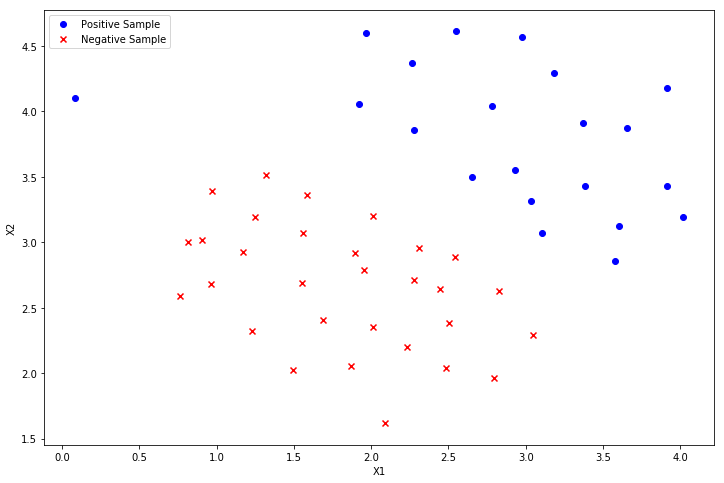

In [6]:
plotData(pos1, neg1)

In [7]:
def plotSVM(X, y, pos, neg, classifier, C, resolution=0.02):
    x1_min, x1_max = min(X[:, 0])-0.1, max(X[:, 0])+0.1
    x2_min, x2_max = min(X[:, 1])-0.1, max(X[:, 1])+0.1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)
    
    plotData(pos, neg)
    
    plt.contourf(xx1, xx2, Z, cmap=plt.cm.Accent, alpha=0.2)
    plt.title('SVM Decision Boundary with C = %i'%(C))
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    plt.show()

#### SVM Decision Boundary

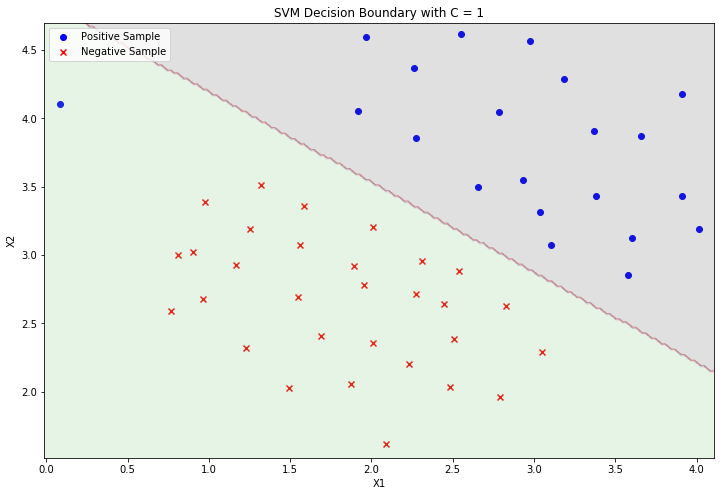

In [8]:
clf = svm.SVC(C=1, kernel='linear')
clf.fit(X1, y1.ravel())
plotSVM(X1, y1, pos1, neg1, clf, C=1, resolution=0.02)

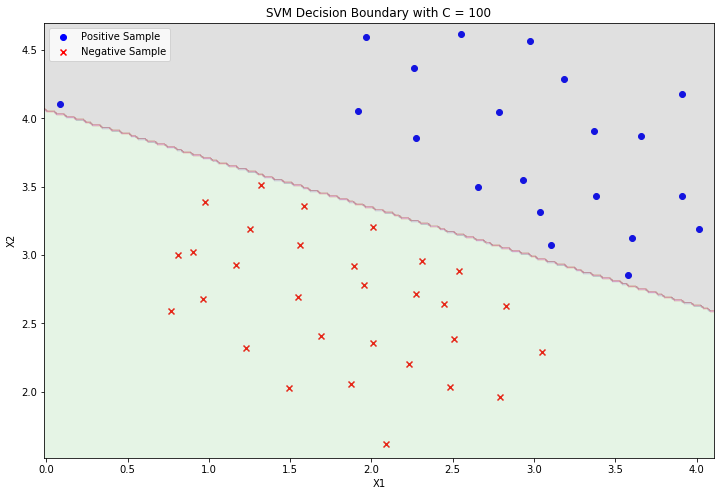

In [9]:
clf.set_params(C=100)
clf.fit(X1, y1.ravel())
plotSVM(X1, y1, pos1, neg1, clf, C=100, resolution=0.02)

## SVM with Gaussian Kernels

In [10]:
def gaussianKernel(x1, x2, sigma):
    K = np.exp(-(np.dot((x1 - x2).T, (x1 - x2))) / (2*np.square(sigma)))
    return (K)

In [11]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2

gaussianKernel(x1, x2, sigma)

0.32465246735834974

#### Dataset 2

In [12]:
data2 = io.loadmat('ex6/ex6data2.mat')
type(data2)

dict

In [13]:
print(data2.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


In [14]:
X2, y2 = data2['X'], data2['y']

# classify the data into positive and negative parts
pos2 = np.array([X2[i] for i in range(X2.shape[0]) if y2[i] == 1])
neg2 = np.array([X2[i] for i in range(X2.shape[0]) if y2[i] == 0])

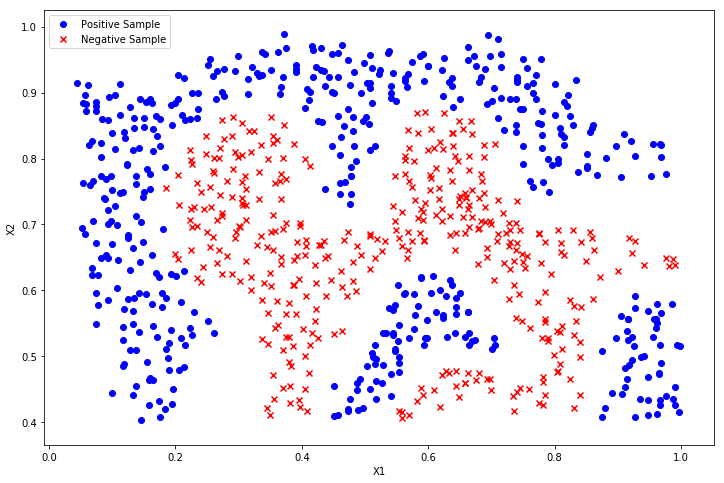

In [15]:
plotData(pos2, neg2)

#### Decision Boundary

#### Gaussian kernel = $\exp \left( -\dfrac {\left\| x-x'\right\| ^{2}}{2\sigma ^{2}}\right)$
#### Sklearn rbf kernel = $\exp(-\gamma \| x-x'\| ^{2})$

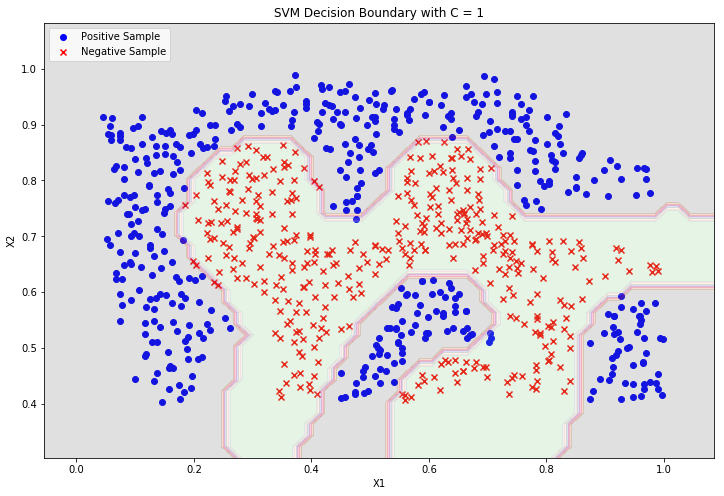

In [16]:
# Gaussian kernel is kernel='rbf' in sklearn, so gamma is (1 / 2*(sigma^2))
sigma = 0.1
gamma = (1/2) * np.power(sigma, -2)
clf_gaussian = svm.SVC(C=1, kernel='rbf', gamma=gamma)
clf_gaussian.fit(X2, y2.ravel())
plotSVM(X2, y2, pos2, neg2, clf_gaussian, C=1, resolution=0.02)

#### Dataset 3

In [17]:
data3 = io.loadmat('ex6/ex6data3.mat')
type(data3)

dict

In [18]:
print(data3.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'yval', 'Xval'])


In [19]:
X3, y3 = data3['X'], data3['y']  # training set
X3_val, y3_val = data3['Xval'], data3['yval']  # cross-validation set

# classify the data into positive and negative parts
pos3 = np.array([X3[i] for i in range(X3.shape[0]) if y3[i] == 1])
neg3 = np.array([X3[i] for i in range(X3.shape[0]) if y3[i] == 0])

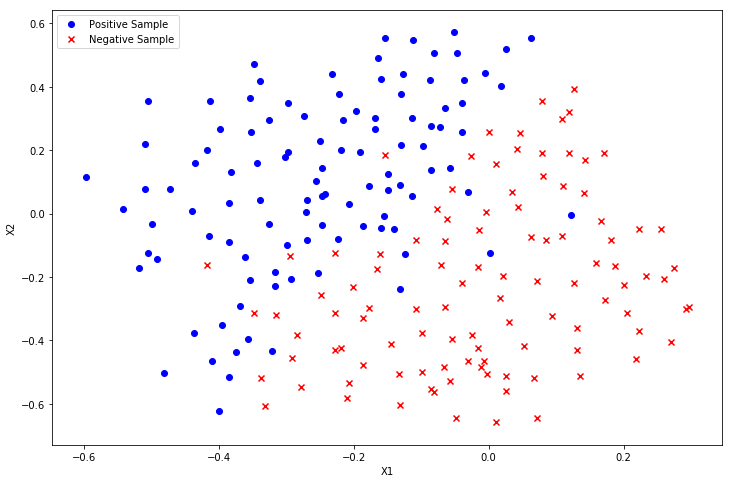

In [20]:
plotData(pos3, neg3)

In [21]:
def chooseBestParams(X, y, X_val, y_val):
    """
    1. Use the cross validation set to determine the best C and σ parameter to use.
    2. For both C and σ, try values in multiplicative steps (e.g., 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30).
    3. Return the optimal C and σ found in the cross-validation set.
    """
    values_try = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
    best_score = 0
    for C_try in values_try:
        for sigma_try in values_try:
            gamma_try = (1/2) * np.power(sigma, -2)
            clf_try = svm.SVC(C=C_try, kernel='rbf', gamma=gamma_try)
            clf_try.fit(X, y.ravel())
            y_pred = clf_try.predict(X_val)
            accuracy_score = metrics.accuracy_score(y_val, y_pred)
            if accuracy_score > best_score:
                best_score = accuracy_score
                best_params = [C_try, sigma_try]
    print('Best C, σ pair is [%f, %f] with a score of %f'%(best_params[0], best_params[1], best_score))
    return(best_params, best_score)

In [23]:
best_params = chooseBestParams(X3, y3, X3_val, y3_val)[0]

Best C, σ pair is [1.000000, 0.010000] with a score of 0.965000


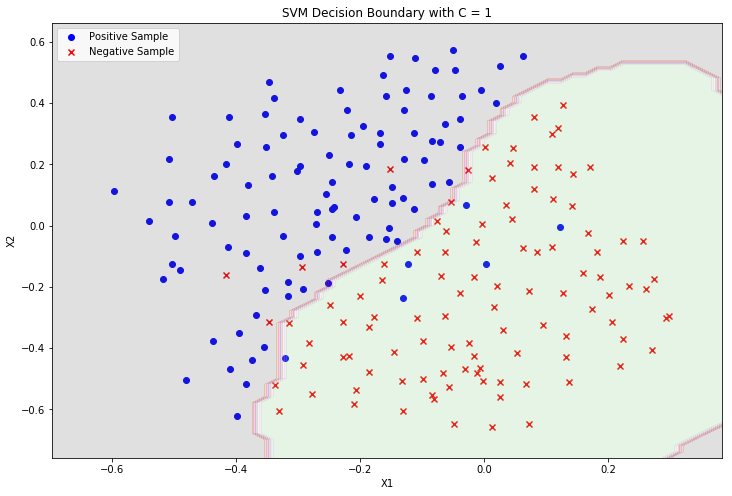

In [27]:
gama_best = (1/2) * np.power(best_params[1], -2)
clf_best = svm.SVC(C=best_params[0], kernel='rbf', gamma=gama_best)
clf_gaussian.fit(X3, y3.ravel())
plotSVM(X3, y3, pos3, neg3, clf_gaussian, C=best_params[0], resolution=0.02)